In [121]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from ipywidgets import interact, interact_manual

In [122]:
rad = lambda x: x/180*np.pi

In [215]:
import importlib
import two_d_tracer
importlib.reload(two_d_tracer)

<module 'two_d_tracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/two_d_tracer.py'>

# Mirrors

In [124]:
scene = two_d_tracer.Scene([two_d_tracer.Ray([-10, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
                           [two_d_tracer.Mirror([0,0],[-np.cos(rad(45/2)),-np.sin(rad(45/2))]),
                           two_d_tracer.Mirror([0,-5], [0,1])])

In [125]:
scene.rays

[Ray([-10.   -2.5], [1. 0.]),
 Ray([-10.    -1.25], [1. 0.]),
 Ray([-10.   0.], [1. 0.]),
 Ray([-10.     1.25], [1. 0.]),
 Ray([-10.    2.5], [1. 0.])]

In [126]:
scene.run(margin=1e-10)

<IPython.core.display.Javascript object>


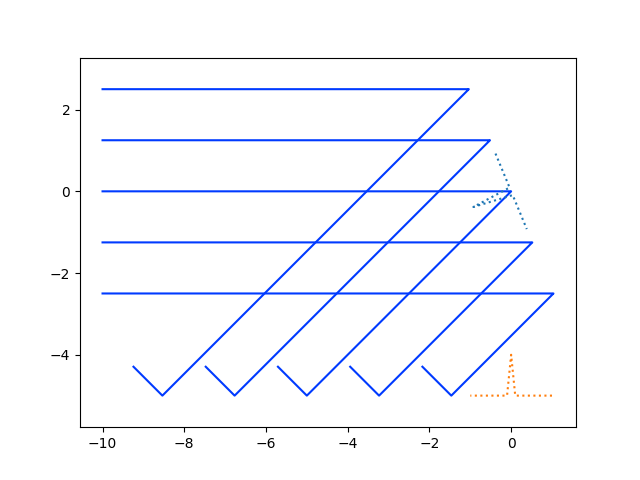

(-10.551776695296637, 1.5873106012293765, -5.375000000000001, 2.875)

In [127]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Refracting surfaces

In [128]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-10, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.RefractiveSurface([0,0], [-1, -1], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [129]:
scene.run()

<IPython.core.display.Javascript object>


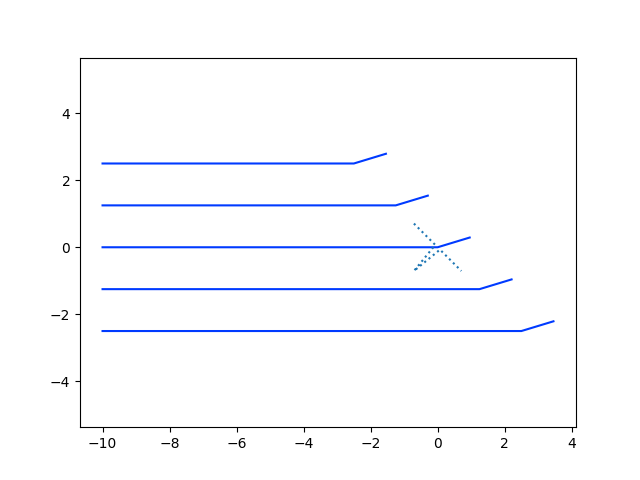

(-10.672847144899352, 4.129790042886396, -2.764513811559352, 3.054790042746397)

In [130]:
fig, ax = plt.subplots()
scene.plot(ax)    
ax.axis("equal")

In [131]:
scene.rays

[Ray([ 3.4569429  -2.20972377], [0.9569429  0.29027623]),
 Ray([ 2.2069429  -0.95972377], [0.9569429  0.29027623]),
 Ray([0.9569429  0.29027623], [0.9569429  0.29027623]),
 Ray([-0.2930571   1.54027623], [0.9569429  0.29027623]),
 Ray([-1.5430571   2.79027623], [0.9569429  0.29027623])]

In [132]:
scene.rays[0].angle

0.2945154851081369

In [133]:
# Compare to Snell's (algebra in Xournal)
rad(45) - np.arcsin(1/1.5*np.sin(rad(45)))

0.29451548510813697

# A glass slab

In [134]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,-0.5]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.RefractiveSurface([0,0], [-1, 0], None, 1, 1.5),
                two_d_tracer.RefractiveSurface([2,0], [1, 0], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [135]:
scene.rays[0].angle

-0.4636476090008061

In [136]:
np.arcsin(1/1.5*np.sin(scene.rays[0].angle))

-0.30274595162300433

In [137]:
scene.step()
scene.propagate(1e-14)
print(scene.rays[0].angle)
scene.step()
scene.propagate(1e-14)
scene.step()

-0.30274595162300433


<IPython.core.display.Javascript object>


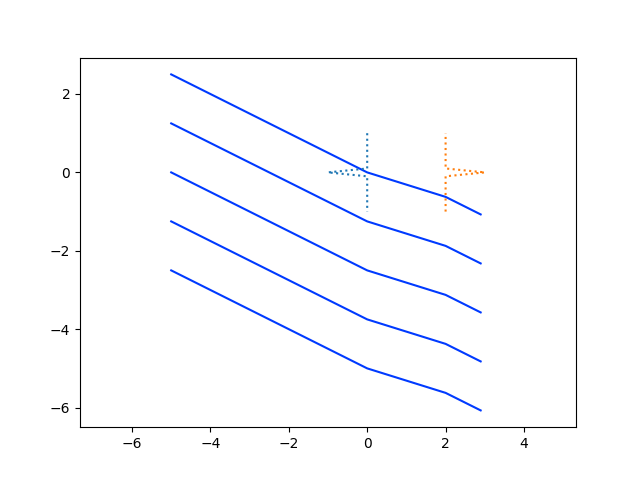

(-5.4, 3.4, -6.500504075207105, 2.9285954321527194)

In [138]:
fig, ax = plt.subplots()
scene.plot(ax)   
ax.axis("equal")

In [139]:
scene.rays[0].angle

-0.463647609000806

# Retroreflector

In [140]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(0.1,2.5, 5)],
    "objects": [two_d_tracer.RefractiveSurface([0,2], [1, 1], None, 1, 1.5),
                two_d_tracer.RefractiveSurface([0,-2], [1, -1], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [141]:
scene.run()

<IPython.core.display.Javascript object>


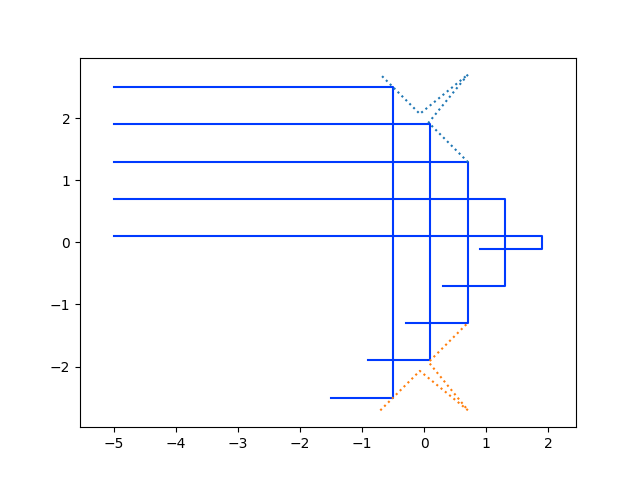

(-5.345, 2.244999999999999, -2.9778174593052023, 2.9778174593052023)

In [142]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

In [143]:
scene.rays

[Ray([ 0.9 -0.1], [-1.  0.]),
 Ray([ 0.3 -0.7], [-1.  0.]),
 Ray([-0.3 -1.3], [-1.  0.]),
 Ray([-0.9 -1.9], [-1.  0.]),
 Ray([-1.5 -2.5], [-1.  0.])]

# Testing Total Internal Reflection

In [144]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1, y], [np.cos(y),np.sin(y)]) for y in np.linspace(0,np.pi/4,30)] + [two_d_tracer.Ray([-1, np.arcsin(1/1.5)], [np.cos(np.arcsin(1/1.5)),np.sin(np.arcsin(1/1.5))],600)],
    "objects": [two_d_tracer.RefractiveSurface([0,0], [1, 0], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [145]:
# Critical angle
np.arcsin(1/1.5)*180/np.pi

41.810314895778596

In [146]:
# Three of the angles tested are above the critical angle, those, are reflected
np.linspace(0,np.pi/4,30)*180/np.pi

array([ 0.        ,  1.55172414,  3.10344828,  4.65517241,  6.20689655,
        7.75862069,  9.31034483, 10.86206897, 12.4137931 , 13.96551724,
       15.51724138, 17.06896552, 18.62068966, 20.17241379, 21.72413793,
       23.27586207, 24.82758621, 26.37931034, 27.93103448, 29.48275862,
       31.03448276, 32.5862069 , 34.13793103, 35.68965517, 37.24137931,
       38.79310345, 40.34482759, 41.89655172, 43.44827586, 45.        ])

In [147]:
scene.run()

<IPython.core.display.Javascript object>


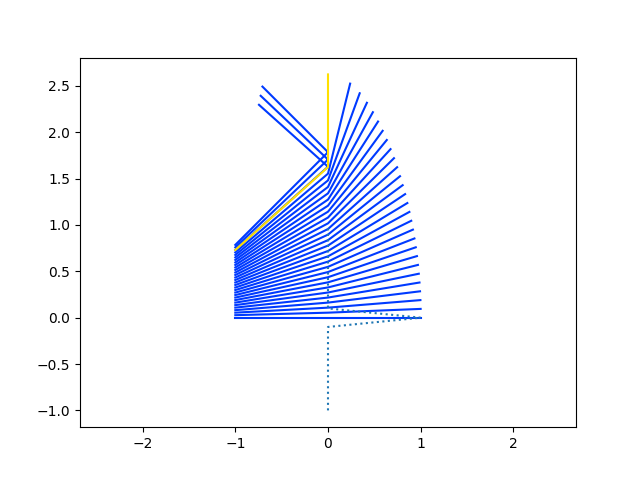

(-1.10000000001, 1.10000000021, -1.181207742371344, 2.8053625897982264)

In [148]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Ray canvas

In [149]:
canvas = two_d_tracer.RayCanvas([0,-3], [0,1])
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y+2.5)*50)) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.RefractiveSurface([0,0], [1, 1], None, 1, 1.5),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [150]:
scene.run()

In [151]:
canvas

RayCanvas([0, -3], [0. 1.]): [2.5, 1.2499999999999996, 6.66133814775094e-16, -1.2499999999999991, -2.4999999999999987]

<IPython.core.display.Javascript object>


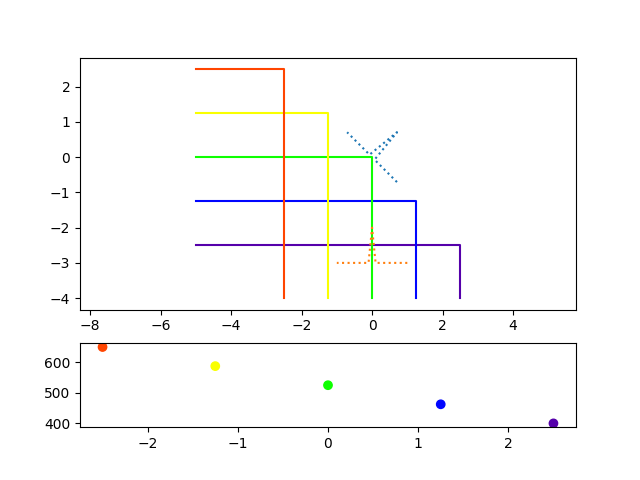

In [152]:
fig, ax = plt.subplots(2, gridspec_kw={"height_ratios":(3,1)})
scene.plot(ax[0])
ax[0].axis("equal")
ax[1].scatter(canvas.points, canvas.wavelengths, c=canvas.c)

# Sphere

In [153]:
canvas = two_d_tracer.RayCanvas([0,0],[0,1])
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.6,2.6, 10)],
    "objects": [two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.5),two_d_tracer.ReflectiveSphere([8,0], 2.5, None, 1, 1.5),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [154]:
scene.run()
scene.propagate(2)

<IPython.core.display.Javascript object>


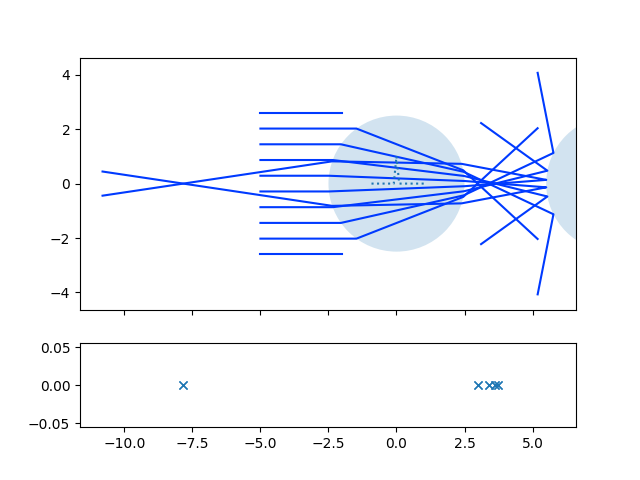

(-11.630301494360825, 6.596707329560326, -4.476850968607872, 4.476850968607868)

In [155]:
fig, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(3,1)})
scene.plot(ax[0])
ax[1].plot(canvas.points, [0 for p in canvas.points], "x")
ax[0].axis("equal")

# Focus in the sphere

In [156]:
canvas = two_d_tracer.RayCanvas([0,0],[0,1])
n2 = 3
# two_d_tracer.ReflectiveSphere([8,0], 2.5, 1, 1.5)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1, y], [1,0]) for y in np.linspace(-0.1,0.1, 50)],
    "objects": [two_d_tracer.Sphere([2.5,0], 2.5, [rad(90), rad(-90)], 1, n2),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [157]:
scene.run()

<IPython.core.display.Javascript object>


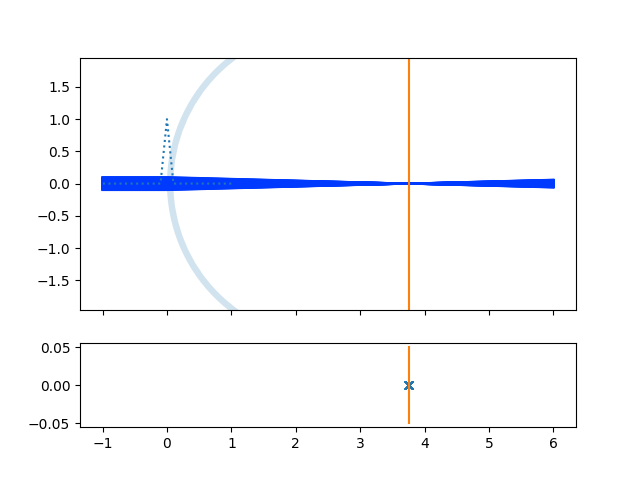

In [158]:
fig, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(3,1)})
scene.plot(ax[0])
ax[1].plot(canvas.points, [0 for p in canvas.points], "x")
ax[0].axis("equal")

# Focus for a single spherical surface in the paraxial approximation, rays colimated:
f = (n2 * 2.5 / (n2-1))
ax[0].plot([f,f], [-2.5,2.5])
ax[1].plot([f,f], [-0.05,0.05])

# Limits

## Mirrors

In [159]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.Mirror([0,0], [-1,1], 2.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [160]:
scene.run()

<IPython.core.display.Javascript object>


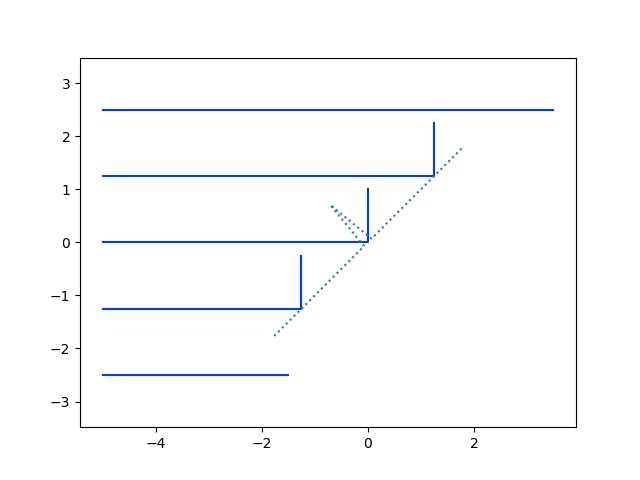

(-5.42500000001, 3.92500000021, -2.75, 2.75)

In [161]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

## Refractive planes

In [162]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0.3]) for y in np.linspace(-1.5,1.5, 11)],
    "objects": [two_d_tracer.RefractiveSurface([-1,1], [-1,1], np.sqrt(2), 1, 1.3),
                two_d_tracer.RefractiveSurface([1,1], [1,1], np.sqrt(2), 1, 1.3),
                two_d_tracer.RefractiveSurface([0,0], [0,-1], 2, 1, 1.3)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [163]:
scene.run()

<IPython.core.display.Javascript object>


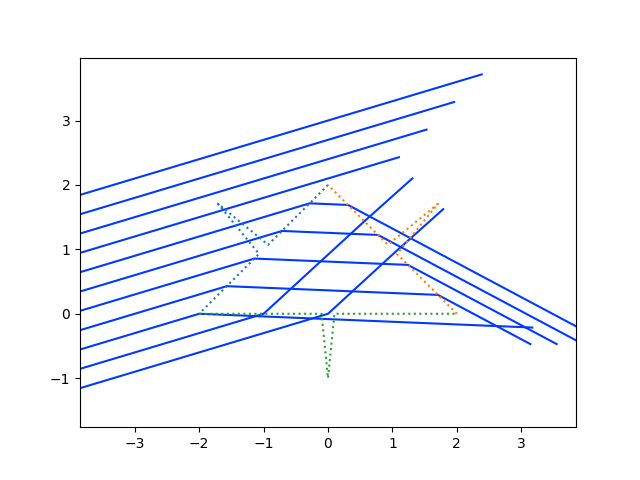

(-2.5, 2.5)

In [164]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")
ax.set_xlim(-2.5,2.5)

## Spheres

In [165]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.6,2.6, 10)],
    "objects": [two_d_tracer.Sphere([0,0], 2.5, [rad(150), rad(-150)], 1, 1.5),
               two_d_tracer.ReflectiveSphere([4,0], 2.5, [rad(-50), rad(50)])]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [166]:
scene.run()

<IPython.core.display.Javascript object>


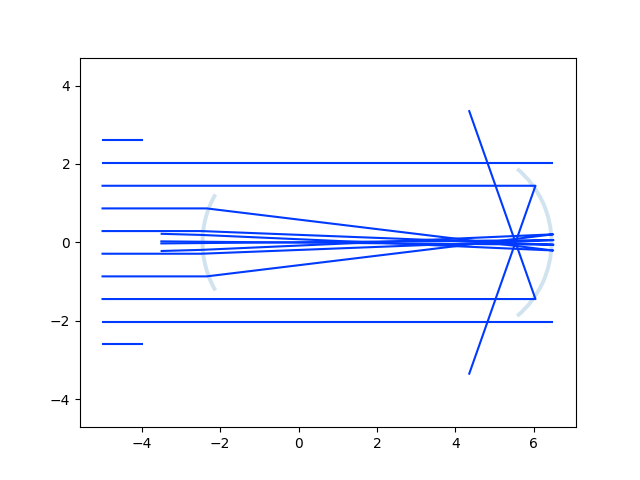

(-5.574965282633034,
 7.0742709352937165,
 -3.6824830157951975,
 3.682483015795196)

In [167]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# The lensmaker equation

$$\frac{1}{f}=(n-1)\left(\frac{1}{R_1}-\frac{1}{R_2}\right)$$ for a think lens. This doesn't quite work, so let's try $$\frac{1}{f} = (n-1) \left( \frac{1}{R_1} - \frac{1}{R_2} + \frac{(n-1)d}{n R_1 R_2} \right),$$
then the distance from the end of the lens to the focus is given as
$$\mbox{BFD} = f \left( 1 - \frac{ (n-1) d}{n R_1} \right),$$
which is taken from https://en.wikipedia.org/wiki/Focal_length.

<IPython.core.display.Javascript object>


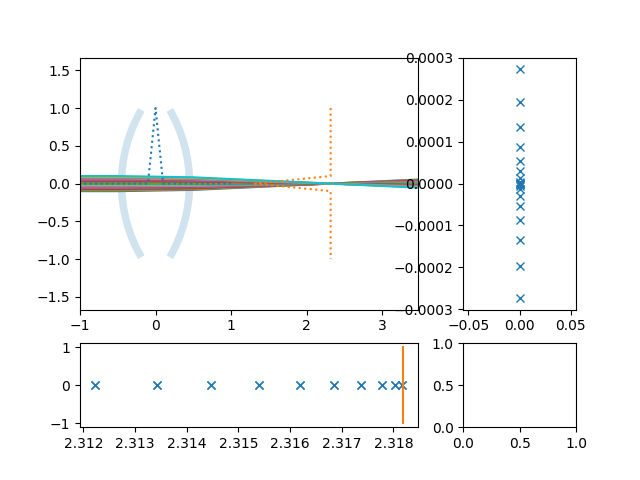

interactive(children=(FloatSlider(value=1.5, description='n', max=4.5, min=-1.5), FloatSlider(value=2.0, descr…

In [168]:
def f(n, R1, R2):
    return 1 / ((n-1)*(1/R1-1/R2))

def f(n, R1, R2, d):
    return 1 / ((n-1)*(1/R1 - 1/R2 + ((n-1)*d)/(n*R1*R2)))

def ffd(f, n, R1, R2, d):
    return f*(1-(n-1)*d/(n*R1))

fig, ax = plt.subplots(2, 2, gridspec_kw={"height_ratios":(3,1), "width_ratios": (3,1)})
ax = ax.flatten()

@interact
def draw(n=1.5, R1=2., R2=-2., d=1.):
    fc = f(n, R1, R2, d)
    ffdc = ffd(fc, n, R1, R2, d) + d/2
    canvas = two_d_tracer.RayCanvas([0,0],[0,1])
    canvas2 = two_d_tracer.RayCanvas([ffdc,0],[-1,0])
    sc_dsc = {
        "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-0.1,0.1, 20)],
        "objects": [two_d_tracer.Sphere([R1-d/2,0], R1, [rad(150), rad(-150)], 1, n),
                    two_d_tracer.Sphere([R2+d/2,0], -R2, [rad(-30), rad(30)], 1, n), canvas, canvas2]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run()
    scene.propagate(2)
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    scene.plot(ax[0], true_color=False)
#     ax[0].plot([ffdc,ffdc], [-1, 1])
    ax[2].plot(canvas.points, [0 for p in canvas.points], "x")
    ax[1].plot([0 for p in canvas.points], canvas2.points, "x")
    ax[2].plot([ffdc,ffdc], [-1, 1])
    ax[0].axis("equal")
    ax[0].set_xlim(-1, 1.5*ffdc)
    print(ffdc)

In [169]:
f(2,1,-1,1)

0.6666666666666666

# Wavelength to rgb testing

<IPython.core.display.Javascript object>


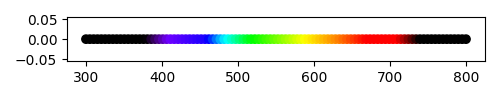

In [170]:
wvl = np.linspace(300, 800, 100)
w = [two_d_tracer.nm_to_rgb(x) for x in wvl]

fig, ax = plt.subplots(figsize=(5,1))
ax.scatter(wvl, np.zeros(wvl.size), c=w)
plt.tight_layout()

# Rainbow prism

In [171]:
# https://refractiveindex.info/?shelf=3d&book=glass&page=BK7
def n_glass(wavelength):
    x = wavelength * 1e-3 # The formula below works in micormeters
    return (1+1.03961212/(1-0.00600069867/x**2)+0.231792344/(1-0.0200179144/x**2)+1.01046945/(1-103.560653/x**2))**.5
    
prism_angle = rad(80)/2
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1.5, 0], [1,1], wl) for wl in np.linspace(410,710, 11)],
    "objects": [two_d_tracer.RefractiveSurface([-np.sin(prism_angle),np.cos(prism_angle)], [-np.cos(prism_angle),np.sin(prism_angle)], 1, 1, n_glass),
                two_d_tracer.RefractiveSurface([np.sin(prism_angle),np.cos(prism_angle)], [+np.cos(prism_angle),np.sin(prism_angle)], 1, 1, n_glass),
                two_d_tracer.RefractiveSurface([0,0], [0,-1], 2*np.sin(prism_angle), 1, n_glass)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [172]:
scene.run(announce_steps=True)

Step 0
Step 1
Step 2
Step 3


<IPython.core.display.Javascript object>


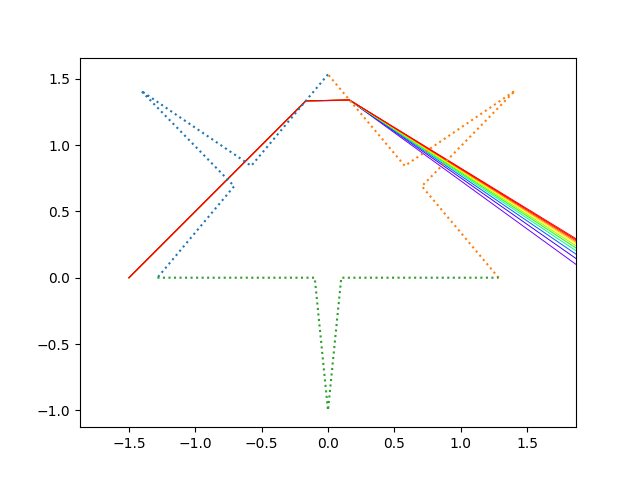

(-1.0, 1.0)

In [173]:
fig, ax = plt.subplots()
scene.plot(ax, ray_kwargs={"lw":0.7})
ax.axis("equal")
ax.set_xlim(-1,1)

# Chromatic aberration

<IPython.core.display.Javascript object>


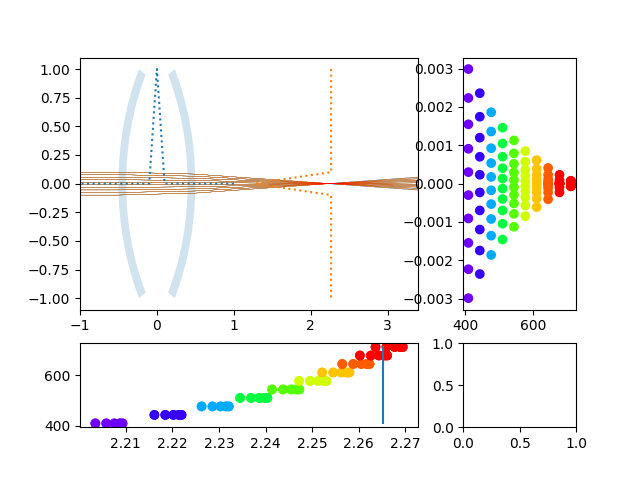

interactive(children=(FloatSlider(value=1.514, description='n', max=1.5295687672239824, min=1.5128024728723604…

In [174]:
def f(n, R1, R2):
    return 1 / ((n-1)*(1/R1-1/R2))

def f(n, R1, R2, d):
    return 1 / ((n-1)*(1/R1 - 1/R2 + ((n-1)*d)/(n*R1*R2)))

def ffd(f, n, R1, R2, d):
    return f*(1-(n-1)*d/(n*R1))

fig, ax = plt.subplots(2, 2, gridspec_kw={"height_ratios":(3,1), "width_ratios": (3,1)})
ax = ax.flatten()

canvas = None

@interact(n=(1.5128024728723604, 1.5295687672239824, 0.005))
def draw(n=1.514, R1=2., R2=-2., d=1.):
    global canvas
    fc = f(n, R1, R2, d)
    ffdc = ffd(fc, n, R1, R2, d) + d/2
    canvas = two_d_tracer.RayCanvas([0,0],[0,1])
    canvas2 = two_d_tracer.RayCanvas([ffdc,0],[-1,0])
    sc_dsc = {
        "rays": [two_d_tracer.Ray([-5, y], [1,0], wl) for wl in np.linspace(410,710, 10) for y in np.linspace(-0.1,0.1,10)],
        "objects": [two_d_tracer.Sphere([R1-d/2,0], R1, [rad(150), rad(-150)], 1, n_glass),
                    two_d_tracer.Sphere([R2+d/2,0], -R2, [rad(-30), rad(30)], 1, n_glass), canvas, canvas2]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run()
    scene.propagate(2)
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    scene.plot(ax[0], ray_kwargs={"lw":.1})
#     ax[0].plot([ffdc,ffdc], [-1, 1])
    ax[2].scatter(canvas.points, canvas.wavelengths, c=canvas.c)
    ax[1].scatter(canvas2.wavelengths, canvas2.points, c=canvas2.c)
    ax[2].plot([ffdc,ffdc], [410, 710])
#     ax[0].axis("equal")
    ax[0].set_xlim(-1, 1.5*ffdc)
    print(ffdc)

# Reflection momentum calculation

In [217]:
mirror = two_d_tracer.Mirror([0,0], [1, 1], None)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y+2.5)*50)) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [mirror]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [218]:
# Initial momentum of the photons
initial = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(initial)

[0.00980751 0.        ]


In [219]:
scene.run()

<IPython.core.display.Javascript object>


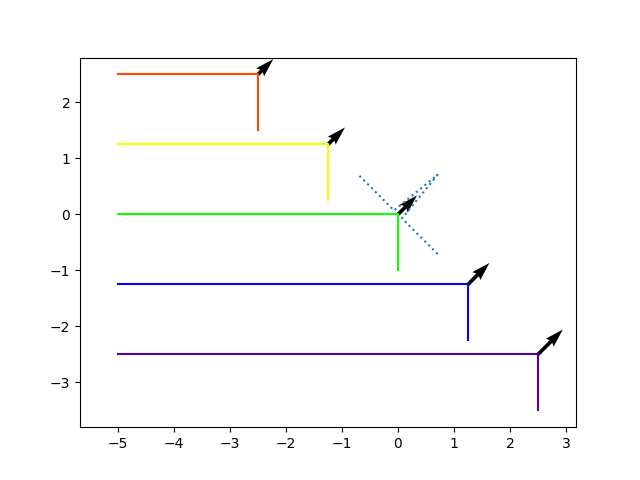

(-5.375, 2.875, -3.80000000021, 2.80000000001)

In [220]:
fig,ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")

In [179]:
# The momentum change observed by the plane
mirror.momenta

[array([0.0025, 0.0025]),
 array([0.00216216, 0.00216216]),
 array([0.00190476, 0.00190476]),
 array([0.00170213, 0.00170213]),
 array([0.00153846, 0.00153846])]

In [180]:
# Total change of mirror momentum
np.sum(mirror.momenta, axis=0)

array([0.00980751, 0.00980751])

In [181]:
# Final momentum of the photons
final = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(final)

[ 2.17770541e-18 -9.80751326e-03]


In [182]:
# Change in total photon momentum
final-initial

array([-0.00980751, -0.00980751])

In [183]:
# Change of momentum for the entire system:
np.sum(mirror.momenta, axis=0) + final - initial
# Woo, the system has conserved momentum!

array([0., 0.])

# Refraction momentum calculation

## Surface

In [238]:
surface1 = two_d_tracer.RefractiveSurface([2,0], [1,1], 5*np.sqrt(2), 1, 1.2)
surface2 = two_d_tracer.RefractiveSurface([-2,0], [-1,1], 2*np.sqrt(2), 1, 1.2)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y+1.5)*50)) for y in np.linspace(-1.5,1.5, 5)],
    "objects": [surface1, surface2]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [239]:
# Initial momentum of the photons
initial = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(initial)

[0.01066038 0.        ]


In [240]:
scene.run()

<IPython.core.display.Javascript object>


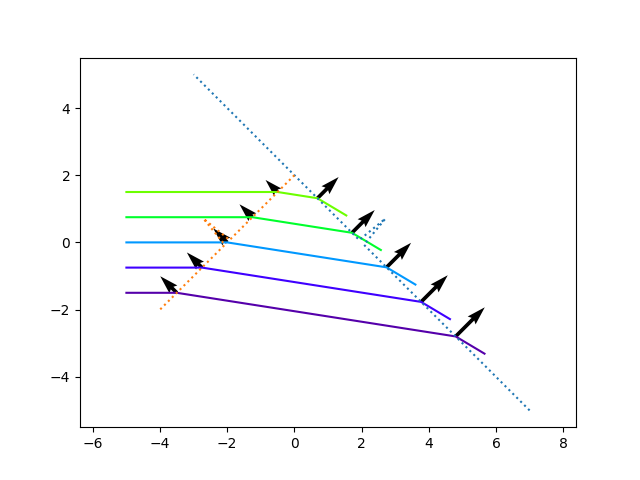

(-5.6, 7.6, -5.5, 5.5)

In [241]:
fig,ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")

In [242]:
# Final momentum of the photons
final = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(final)

[ 0.00915482 -0.00546196]


In [226]:
# Change in total photon momentum
final-initial

array([-0.00150556, -0.00546196])

In [227]:
np.sum(scene.momenta, axis=0)

array([0.00150556, 0.00546196])

## Sphere

In [231]:
sphere = two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.1)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y)*200)) for y in np.linspace(0,1.5, 5)],
    "objects": [sphere]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [232]:
# Initial momentum of the photons
initial = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(initial)

[0.00945202 0.        ]


In [233]:
scene.run()

<IPython.core.display.Javascript object>


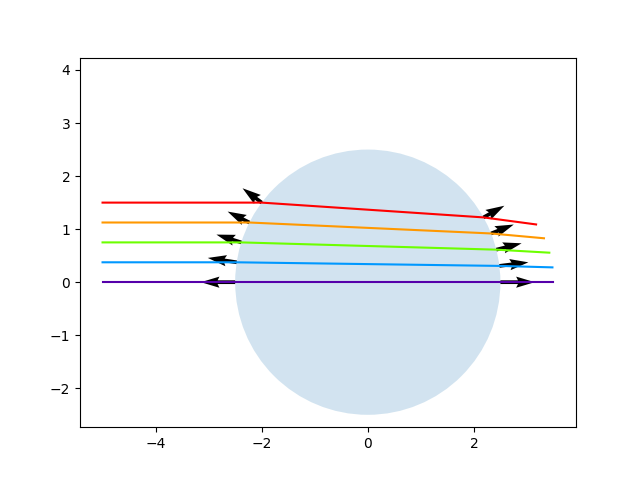

(-5.42500000001, 3.92500000021, -0.07500000000000001, 1.575)

In [234]:
fig,ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")

In [235]:
# Final momentum of the photons
final = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(final)

[ 0.00942906 -0.00049589]


In [236]:
# Change in total photon momentum
final-initial

array([-2.29523806e-05, -4.95888506e-04])

In [237]:
np.sum(scene.momenta, axis=0)

array([2.29523806e-05, 4.95888506e-04])